# Assignment - 04
 180140D

In [1]:
# import the libraries
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def get_accuracy(y_pred,y_train):
    k = 0
    for i in range(len(y_train)):
        max_t = max(list(y_train[i]))
        max_t_index = list(y_train[i]).index(max_t)
        max_p = max(list(y_pred[i]))
        max_p_index = list(y_pred[i]).index(max_p)
        if max_t_index == max_p_index:
            k += 1
    return(k/len(y_train))

In [3]:
# Preprocessing
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set

# Displaying No of test and training samples
print('x_train: ', x_train.shape)  
print('x_test: ', x_test.shape)

K = len(np.unique(y_train)) # 10 Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)


# Question 1
 (a) Implement gradient descent and run for 300 epochs.
 (b) Show the weights matrixW as 10 images.
 (c) Report the (initial) learning rate, training and testing loss and accuracies.

In [8]:
std=1e-5
w1 = std*np.random.randn(Din, K) # Initializing the weight matrix with random values
b1 = np.zeros(K) # Initializing bias as zeros
print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr
iterations = 300   # Run for 300 epochs
lr = 1.5e-2       # Learning Rate
lr_decay = 0.999
reg = 2.5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history =[]
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    y_pred=np.dot(x_train,w1)+b1
    loss=1/batch_size*np.square(y_pred-y_train).sum()+reg*np.sum(w1*w1)
    loss_history.append(loss)
    
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y_train)
    db1=dy_pred.sum()
    dw1=x_train.T.dot(dy_pred)+ 2*reg*w1
    w1-=lr*dw1
    b1-=lr*db1
    
    train_acc = get_accuracy( y_pred,y_train)
    train_acc_history.append(train_acc)
    y_pred2=x_test.dot(w1)+b1
    valid_acc = get_accuracy(y_pred2,y_test)
    val_acc_history.append(valid_acc)
    
    if (t%20 == 0):
        print('Epoch {} | loss {:.5f} | Training Acc {:.5f} | Validation Acc {:.5f} | Learning Rate {:.5f}'.format(t,loss,train_acc,valid_acc,lr))
    lr_history.append(lr)
    lr*=lr_decay

w1: (3072, 10)
b1: (10,)
Epoch 0 | loss 1.00002 | Training Acc 0.07762 | Validation Acc 0.24920 | Learning Rate 0.01500
Epoch 20 | loss 0.80916 | Training Acc 0.37436 | Validation Acc 0.37620 | Learning Rate 0.01470
Epoch 40 | loss 0.80082 | Training Acc 0.38930 | Validation Acc 0.38920 | Learning Rate 0.01441
Epoch 60 | loss 0.79651 | Training Acc 0.39704 | Validation Acc 0.39280 | Learning Rate 0.01413
Epoch 80 | loss 0.79362 | Training Acc 0.40212 | Validation Acc 0.39560 | Learning Rate 0.01385
Epoch 100 | loss 0.79146 | Training Acc 0.40550 | Validation Acc 0.39590 | Learning Rate 0.01357
Epoch 120 | loss 0.78975 | Training Acc 0.40920 | Validation Acc 0.39710 | Learning Rate 0.01330
Epoch 140 | loss 0.78835 | Training Acc 0.41146 | Validation Acc 0.39880 | Learning Rate 0.01304
Epoch 160 | loss 0.78718 | Training Acc 0.41288 | Validation Acc 0.40010 | Learning Rate 0.01278
Epoch 180 | loss 0.78619 | Training Acc 0.41476 | Validation Acc 0.40150 | Learning Rate 0.01253
Epoch 200 |

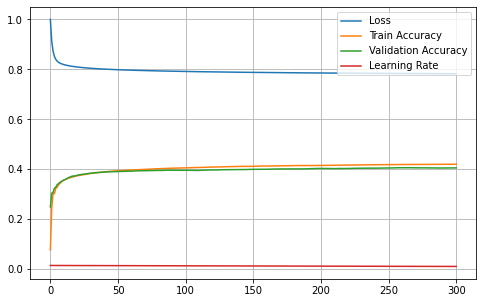

In [16]:
import pandas as pd
df = pd.DataFrame(loss_history, columns = ['Loss'])
df['Train Accuracy'] = train_acc_history
df['Validation Accuracy'] = val_acc_history
df['Learning Rate'] = lr_history

pd.DataFrame(df).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

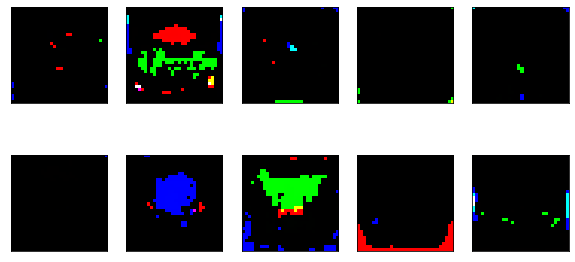

In [22]:
# Printing accuracies and displaying w as images
plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img=255.0*w1[:,i].reshape(32,32,3)
    plt.imshow(img.astype('uint8'))
plt.show()

In [24]:
y_pred1 = x_train.dot(w1)+b1
train_acc = get_accuracy(y_pred,y_train)
print('train_accuracy = ',train_acc)

y_pred2=x_test.dot(w1)+b1
test_acc = get_accuracy(y_pred2,y_test)
print('test_accuracy = ',test_acc)

train_accuracy =  0.4203
test_accuracy =  0.4055


# Question 2
Code a two-layer fully connected network with H = 200 hidden nodes.

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set

# Displaying No of test and training samples
print('x_train: ', x_train.shape)  
print('x_test: ', x_test.shape)

K = len(np.unique(y_train)) # 10 Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)


In [14]:
H = 200 # No of hidden layers which is mentioned in the question
std = 1e-5
# Initializing Weights as random values and bias as zeros
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print('w1:',w1.shape)
print('b1:',b1.shape)
print('w2:',w2.shape)
print('b2:',b2.shape)

batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []
for t in range(iterations+1):
    x=x_train
    y=y_train
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
    y_pred = h.dot(w2) + b2
    loss= 1./batch_size*np.square(y_pred - y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis = 0)
    dh = dy_pred.dot(w2.T)
    db1 = (dh*h*(1-h)).sum(axis = 0)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    
   
    x_t = x_train
    h=1.0/(1.0+np.exp(-(x_t.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    train_acc = get_accuracy(y_pred,y_train)
    train_acc_history.append(train_acc)
    lr_history.append(lr)
    if t%20 == 0:
        print('Epoch {} | loss {:.5f} | Training Acc = {:.5f}'.format(t,loss,train_acc))
    lr *= lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 0 | loss 0.99998 | Training Acc = 0.11956
Epoch 20 | loss 0.84243 | Training Acc = 0.26196
Epoch 40 | loss 0.82091 | Training Acc = 0.32004
Epoch 60 | loss 0.80007 | Training Acc = 0.36314
Epoch 80 | loss 0.78887 | Training Acc = 0.38188
Epoch 100 | loss 0.78025 | Training Acc = 0.40510
Epoch 120 | loss 0.77452 | Training Acc = 0.41730
Epoch 140 | loss 0.77200 | Training Acc = 0.40282
Epoch 160 | loss 0.76416 | Training Acc = 0.42390
Epoch 180 | loss 0.75973 | Training Acc = 0.43406
Epoch 200 | loss 0.75357 | Training Acc = 0.44752
Epoch 220 | loss 0.75100 | Training Acc = 0.43890
Epoch 240 | loss 0.74442 | Training Acc = 0.45120
Epoch 260 | loss 0.74362 | Training Acc = 0.45072
Epoch 280 | loss 0.73765 | Training Acc = 0.45200
Epoch 300 | loss 0.73315 | Training Acc = 0.46414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<function matplotlib.pyplot.show(close=None, block=None)>

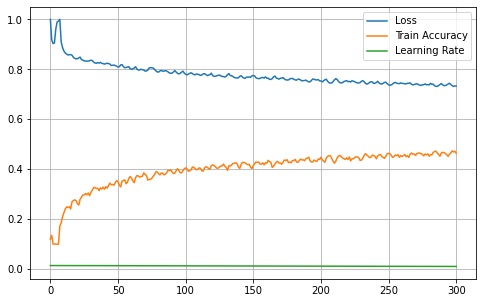

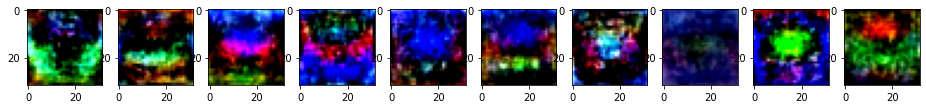

In [15]:
import pandas as pd
df = pd.DataFrame(loss_history, columns = ['Loss'])
df['Train Accuracy'] = train_acc_history
df['Learning Rate'] = lr_history

pd.DataFrame(df).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()

f,ax = plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range(10):
    img = w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show 

In [16]:
train_acc = get_accuracy(y_pred,y_train)
print("Train Accuracy = ",train_acc)

Train Accuracy =  0.46414


In [17]:
test_acc = get_accuracy(y_pred,y_test)
print("Test Accuracy = ",train_acc)

x=x_test
y=y_test
h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
y_pred = h.dot(w2)+b2   
loss = (1./Nte)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
print("Test loss = ",loss)

Test Accuracy =  0.46414
Test loss =  0.7619710659453636


# Question 3
 Carry out stochastic gradient descent with a batch size of 500.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set

# Displaying No of test and training samples
print('x_train: ', x_train.shape)  
print('x_test: ', x_test.shape)

K = len(np.unique(y_train)) # 10 Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)


In [4]:
H = 200 # No of hidden layers which is mentioned in the question
std = 1e-5
# Initializing Weights as random values and bias as zeros
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print('w1:',w1.shape)
print('b1:',b1.shape)
print('w2:',w2.shape)
print('b2:',b2.shape)

batch_size = 500
iterations = 300
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []
final_train_acc_history = []
seed = 0
rng = np.random.default_rng(seed = seed)
for t in range(iterations+1):
    for i in range(int(Ntr/batch_size)):
        indices = np.array(range((i*batch_size),((i+1)*batch_size)))
        rng.shuffle(indices)
        x=x_train[indices]
        y=y_train[indices]
        
        h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
        y_pred = h.dot(w2) + b2
        loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2*w2)+np.sum(w1*w1))
        loss_history.append(loss)

        dy_pred=1./batch_size*2.0*(y_pred-y)
        dw2 = h.T.dot(dy_pred) + reg*w2
        db2 = dy_pred.sum(axis = 0)
        dh = dy_pred.dot(w2.T)
        db1 = (dh*h*(1-h)).sum(axis = 0)
        dw1=x.T.dot(dh*h*(1-h)) + reg*w1
        w1 -= lr*dw1
        b1 -= lr*db1
        w2 -= lr*dw2
        b2 -= lr*db2
        lr *= lr_decay
   
        x_train2 = x
        h=1.0/(1.0+np.exp(-(x_train2.dot(w1)+b1)))
        y_pred2 = h.dot(w2)+b2
        train_acc = get_accuracy(y_pred2, y)
        train_acc_history.append(train_acc)
    x_train3 = x_train
    h=1.0/(1.0+np.exp(-(x_train3.dot(w1)+b1)))
    y_pred3 = h.dot(w2)+b2
    final_train_acc = get_accuracy(y_pred3,y_train)
    final_train_acc_history.append(final_train_acc)
    lr_history.append(lr)
    if t%20 == 0:
        print('Epoch {} | loss {:.5f} |Batch Train Accuracy {:.5f} | Train Accuracy = {:.5f}'.format(t,loss,train_acc,final_train_acc))

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 0 | loss 0.79128 |Batch Train Accuracy 0.42000 | Train Accuracy = 0.38002
Epoch 20 | loss 0.63027 |Batch Train Accuracy 0.60800 | Train Accuracy = 0.59030
Epoch 40 | loss 0.60401 |Batch Train Accuracy 0.61600 | Train Accuracy = 0.63814
Epoch 60 | loss 0.59891 |Batch Train Accuracy 0.61400 | Train Accuracy = 0.64602
Epoch 80 | loss 0.59804 |Batch Train Accuracy 0.61200 | Train Accuracy = 0.64720
Epoch 100 | loss 0.59791 |Batch Train Accuracy 0.61200 | Train Accuracy = 0.64746
Epoch 120 | loss 0.59790 |Batch Train Accuracy 0.61200 | Train Accuracy = 0.64756
Epoch 140 | loss 0.59789 |Batch Train Accuracy 0.61200 | Train Accuracy = 0.64756
Epoch 160 | loss 0.59789 |Batch Train Accuracy 0.61200 | Train Accuracy = 0.64756
Epoch 180 | loss 0.59789 |Batch Train Accuracy 0.61200 | Train Accuracy = 0.64756
Epoch 200 | loss 0.59789 |Batch Train Accuracy 0.61200 | Train Accuracy = 0.64756
Epoch 220 | loss 0.59789 |Batch Train Accuracy 0.6120

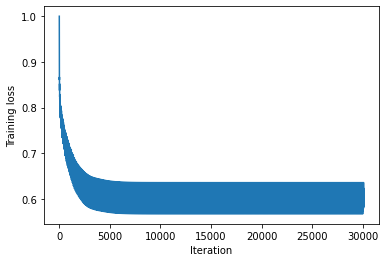

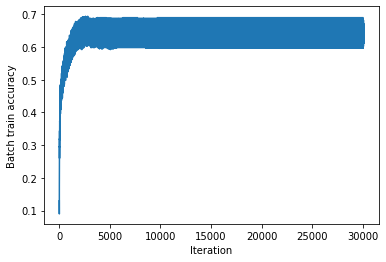

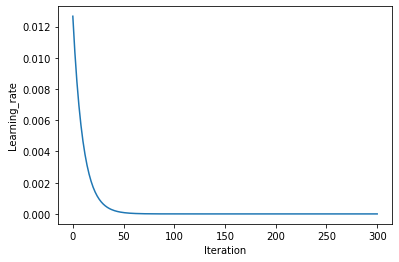

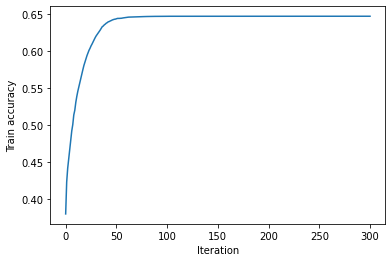

In [9]:
'''fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(30,6))
dic = {"Loss":loss_history, "Training Accuracy ":final_train_acc_history,\
        "Batch Train Accuracy":train_acc_history, "Learning Rate":lr_history}
l = 1
for key in dic.keys():
    plt.subplot(1,4,l);plt.plot(dic[key])
    plt.title(key); plt.xlabel('Iterations')
    l+=1'''
fig , ax = plt.subplots()
ax.plot(loss_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Training loss')
plt.show()

fig , ax = plt.subplots()
ax.plot(train_acc_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Batch train accuracy')
plt.show()

fig , ax = plt.subplots()
ax.plot(lr_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Learning_rate')
plt.show()

fig , ax = plt.subplots()
ax.plot(final_train_acc_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Train accuracy')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Train Accuracy =  0.612
Train Loss =  0.597893010700427
Test Accuracy =  0.4627
Test loss =  0.7397680639994612


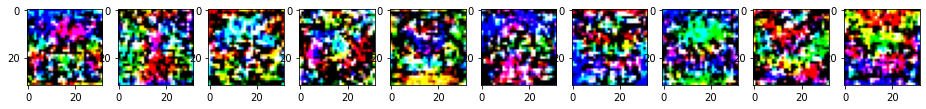

In [12]:
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show 


x_train2 = x
h=1.0/(1.0+np.exp(-(x_train2.dot(w1)+b1)))
y_pred2 = h.dot(w2)+b2
train_acc = get_accuracy(y_pred2, y)
print("Train Accuracy = ",train_acc)

x=x_train[indices]
y=y_train[indices]
        
h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
y_pred = h.dot(w2) + b2
loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2*w2)+np.sum(w1*w1))
print("Train Loss = ",loss)

nx_t = x_test
h=1.0/(1.0+np.exp(-(nx_t.dot(w1)+b1)))
y_pred3=h.dot(w2)+b2
test_acc = get_accuracy(y_pred3,y_test,)
print("Test Accuracy = ",test_acc)

x=x_test
y=y_test
h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
y_pred = h.dot(w2)+b2   
loss = (1./Nte)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
print("Test loss = ",loss)

# Question 4
Construct a CNN using Keras.models.Sequential

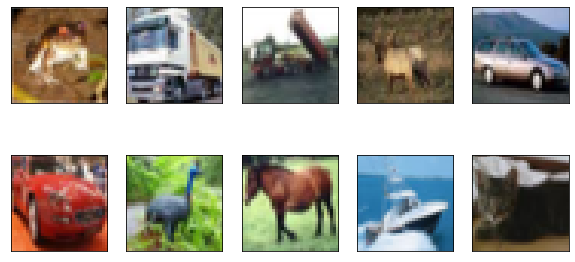

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set
K = len(np.unique(y_train))
classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Track']

plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

#Data reshape
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))

#Data Normalization
x_train = x_train / 255.
x_test = x_test / 255.

mean_image = np.mean(x_train, axis=0) 
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Create Model architecture
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation = 'sigmoid'))

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)              

(a) Learnable parameters = 73418

In [41]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.09)
model.compile(loss="categorical_crossentropy",
              optimizer= sgd,
              metrics=["accuracy"])

(b)
The constant learning rate is the default schedule and no momentum is used by default in all Keras Optimizers.Here, I have used the SGD optimizer, the learning rate defaults to 0.01.To use a custom learning rate and momentum, simply instantiate an SGD optimizer and pass 'learning_rate=0.01' and 'momentum = 0.09' as the arguments.

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.09)

So,
Learning rate = 0.01
Momentum = 0.09

In [42]:
model_history = model.fit(x_train, y_train, epochs=30,batch_size= 50,
                    validation_data=(x_test, y_test))

Epoch 1/30
1000/1000 [==============================] - 42s 41ms/step - loss: 1.6523 - accuracy: 0.3990 - val_loss: 1.5319 - val_accuracy: 0.4490
Epoch 2/30
1000/1000 [==============================] - 41s 41ms/step - loss: 1.5042 - accuracy: 0.4537 - val_loss: 1.4153 - val_accuracy: 0.4870
Epoch 3/30
1000/1000 [==============================] - 41s 41ms/step - loss: 1.4040 - accuracy: 0.4930 - val_loss: 1.3732 - val_accuracy: 0.5078
Epoch 4/30
1000/1000 [==============================] - 48s 48ms/step - loss: 1.3346 - accuracy: 0.5225 - val_loss: 1.3517 - val_accuracy: 0.5098
Epoch 5/30
1000/1000 [==============================] - 46s 46ms/step - loss: 1.2743 - accuracy: 0.5455 - val_loss: 1.2574 - val_accuracy: 0.5522
Epoch 6/30
1000/1000 [==============================] - 50s 50ms/step - loss: 1.2156 - accuracy: 0.5724 - val_loss: 1.2332 - val_accuracy: 0.5646
Epoch 7/30
1000/1000 [==============================] - 49s 49ms/step - loss: 1.1702 - accuracy: 0.5869 - val_loss: 1.1668 -

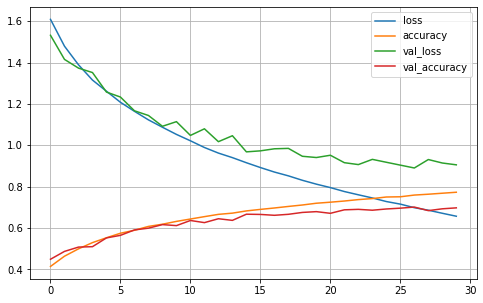

In [43]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

(c)

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss : ',test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.9055 - accuracy: 0.6975
Test loss :  0.9055498838424683
Test accuracy:  0.6974999904632568
